In [78]:
import pandas as pd

marketing_campaign_data = 'marketing_campaign.csv'

marketing_campaign_dataframe = pd.read_csv(marketing_campaign_data,
                                           sep='\t',
                                           low_memory=False)

In [12]:
import warnings

warnings.filterwarnings('ignore')

In [79]:
marketing_campaign_dataframe = marketing_campaign_dataframe.reset_index()

In [80]:
marketing_campaign_dataframe.head()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [81]:
marketing_campaign_dataframe = marketing_campaign_dataframe.drop(labels=2234, axis=0)

In [82]:
marketing_campaign_dataframe['Total spent'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['MntWines'] + marketing_campaign_dataframe['MntFruits'] +
                           marketing_campaign_dataframe['MntMeatProducts'] + marketing_campaign_dataframe['MntFishProducts'] + 
                           marketing_campaign_dataframe['MntSweetProducts'] + marketing_campaign_dataframe['MntGoldProds'], axis=1)

marketing_campaign_dataframe['Total accept cmp'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['AcceptedCmp1'] + marketing_campaign_dataframe['AcceptedCmp2'] +
                           marketing_campaign_dataframe['AcceptedCmp3'] + marketing_campaign_dataframe['AcceptedCmp4'] + 
                           marketing_campaign_dataframe['AcceptedCmp5'], axis=1)

marketing_campaign_dataframe['Total purchases'] = marketing_campaign_dataframe.apply(lambda marketing_campaign_dataframe: 
                           marketing_campaign_dataframe['NumDealsPurchases'] + marketing_campaign_dataframe['NumWebPurchases'] +
                           marketing_campaign_dataframe['NumCatalogPurchases'] + marketing_campaign_dataframe['NumStorePurchases'], axis=1)

In [83]:
marketing_campaign_dataframe.head()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total spent,Total accept cmp,Total purchases
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,0,25
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,0,6
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,0,21
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,0,8
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,0,19


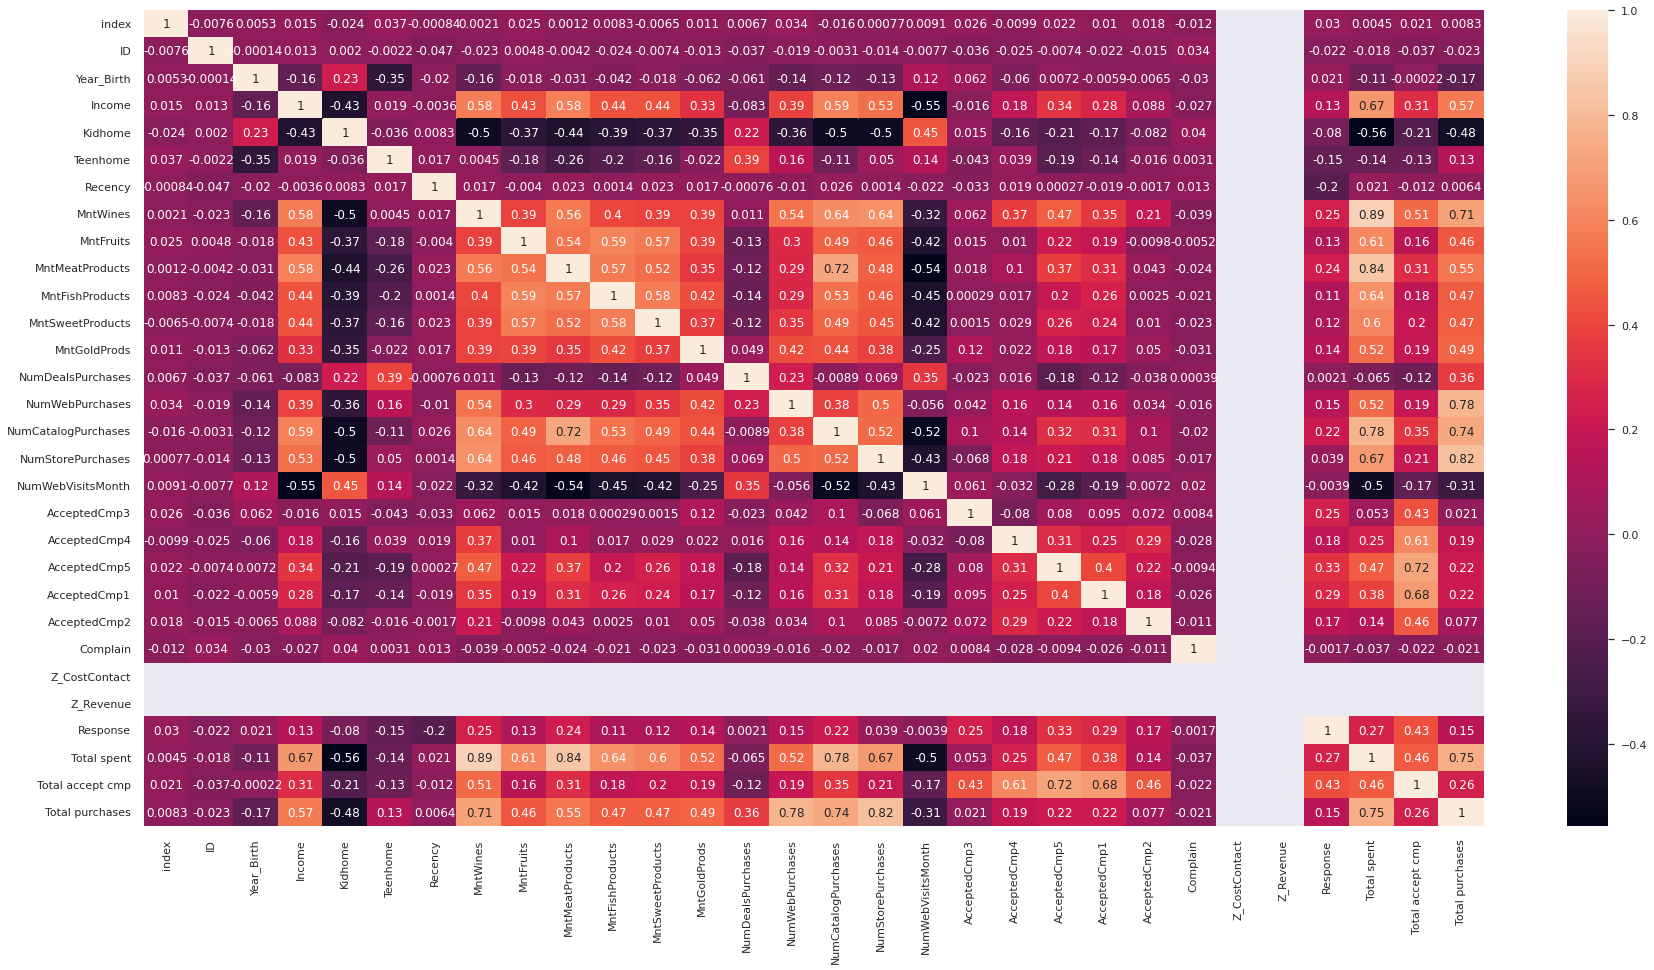

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(30, 15))
sns.heatmap(marketing_campaign_dataframe.corr(), annot=True)

plt.show()

In [85]:
from sklearn.cluster import KMeans

X = marketing_campaign_dataframe[['ID', 'Education', 'Marital_Status', 'Income',
                                  'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                  'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                                  'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                  'Complain', 'Response', 'Total spent', 'Total accept cmp',
                                  'Total purchases']].copy()

X.columns = ['Identificação do cliente', 'Escolaridade', 'Estado Civil', 'Renda anual do cliente',
             'Qnt. Crianças em casa', 'Qnt. Adolescentes em casa', 'Recência', 'Reclamações do cliente', 
             'Qnt. gasta em vinho', 'Qnt. gasta em frutas', 'Qnt. gasta em carne', 'Qnt. gasta em peixe', 
             'Qnt. gasta em doce', 'Qnt. gasta produtos em ouro', 'Qnt. compras realizadas com desconto',
             'Qnt. compras realizadas pelo site', 'Qnt. compras realizadas pelo catálogo',
             'Qnt. compras feitas na loja fisica', 'Qnt. visitas ao site mensalmente', 
             'Oferta aceita na terceira campanha', 'Oferta aceita na quarta campanha',
             'Oferta aceita na quinta campanha', 'Oferta aceita na primeira campanha',
             'Oferta aceita na segunda campanha', 'Reclamações', 'Resposta dos clientes à campanha',
             'Total gasto', 'Total aceito durante a campanha', 'Total de compras']

X.head()

,Identificação do cliente,Escolaridade,Estado Civil,Renda anual do cliente,Qnt. Crianças em casa,Qnt. Adolescentes em casa,Recência,Reclamações do cliente,Qnt. gasta em vinho,Qnt. gasta em frutas,Qnt. gasta em carne,Qnt. gasta em peixe,Qnt. gasta em doce,Qnt. gasta produtos em ouro,Qnt. compras realizadas com desconto,Qnt. compras realizadas pelo site,Qnt. compras realizadas pelo catálogo,Qnt. compras feitas na loja fisica,Qnt. visitas ao site mensalmente,Oferta aceita na terceira campanha,Oferta aceita na quarta campanha,Oferta aceita na quinta campanha,Oferta aceita na primeira campanha,Oferta aceita na segunda campanha,Reclamações,Resposta dos clientes à campanha,Total gasto,Total aceito durante a campanha,Total de compras
0,5524,Graduation,Single,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,25
1,2174,Graduation,Single,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,0,6
2,4141,Graduation,Together,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,21
3,6182,Graduation,Together,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,0,8
4,5324,PhD,Married,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,0,19


In [86]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, columns=['Escolaridade', 'Estado Civil'])
X.columns = ['Identificação do cliente', 'Renda anual do cliente', 'Qnt. Crianças em casa', 'Qnt. Adolescentes em casa',
             'Recência', 'Reclamações do cliente', 'Qnt. gasta em vinho', 'Qnt. gasta em frutas', 
             'Qnt. gasta em carne', 'Qnt. gasta em peixe', 'Qnt. gasta em doce', 
             'Qnt. gasta produtos em ouro', 'Qnt. compras realizadas com desconto',
             'Qnt. compras realizadas pelo site', 'Qnt. compras realizadas pelo catálogo',
             'Qnt. compras feitas na loja fisica', 'Qnt. visitas ao site mensalmente',
             'Oferta aceita na terceira campanha', 'Oferta aceita na quarta campanha',
             'Oferta aceita na quinta campanha', 'Oferta aceita na primeira campanha',
             'Oferta aceita na segunda campanha', 'Reclamações', 'Resposta dos clientes à campanha',
             'Total gasto', 'Total aceito durante a campanha', 'Total de compras', 
             'Doutor', 'Ensino médio', 'Ensino superior', 'Mestre', 'PhD', 
             'Estado Civil Absurdo', 'Estado Civil Sozinho', 'Estado Civil Divorciado',
             'Estado Civil Casado', 'Estado Civil Solteiro', 'Estado Civil Juntos',
             'Estado Civil Viúvo', 'Estado Civil Desapegado']

X.head()

,Identificação do cliente,Renda anual do cliente,Qnt. Crianças em casa,Qnt. Adolescentes em casa,Recência,Reclamações do cliente,Qnt. gasta em vinho,Qnt. gasta em frutas,Qnt. gasta em carne,Qnt. gasta em peixe,Qnt. gasta em doce,Qnt. gasta produtos em ouro,Qnt. compras realizadas com desconto,Qnt. compras realizadas pelo site,Qnt. compras realizadas pelo catálogo,Qnt. compras feitas na loja fisica,Qnt. visitas ao site mensalmente,Oferta aceita na terceira campanha,Oferta aceita na quarta campanha,Oferta aceita na quinta campanha,Oferta aceita na primeira campanha,Oferta aceita na segunda campanha,Reclamações,Resposta dos clientes à campanha,Total gasto,Total aceito durante a campanha,Total de compras,Doutor,Ensino médio,Ensino superior,Mestre,PhD,Estado Civil Absurdo,Estado Civil Sozinho,Estado Civil Divorciado,Estado Civil Casado,Estado Civil Solteiro,Estado Civil Juntos,Estado Civil Viúvo,Estado Civil Desapegado
0,5524,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617,0,25,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2174,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27,0,6,0,0,1,0,0,0,0,0,0,1,0,0,0
2,4141,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776,0,21,0,0,1,0,0,0,0,0,0,0,1,0,0
3,6182,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53,0,8,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5324,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422,0,19,0,0,0,0,1,0,0,0,1,0,0,0,0


In [87]:
for content in X:
    X.dropna(subset=[content], inplace=True)

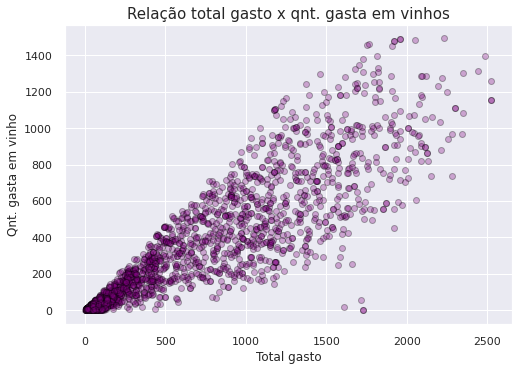

In [282]:
plt.scatter(X['Total gasto'], X['Qnt. gasta em vinho'], alpha=0.3, color='purple',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta em vinhos', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta em vinho', fontsize=12)

plt.show()

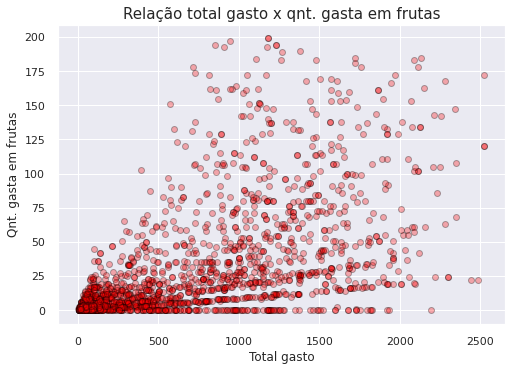

In [284]:
plt.scatter(X['Total gasto'], X['Qnt. gasta em frutas'], alpha=0.3, color='red',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta em frutas', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta em frutas', fontsize=12)

plt.show()

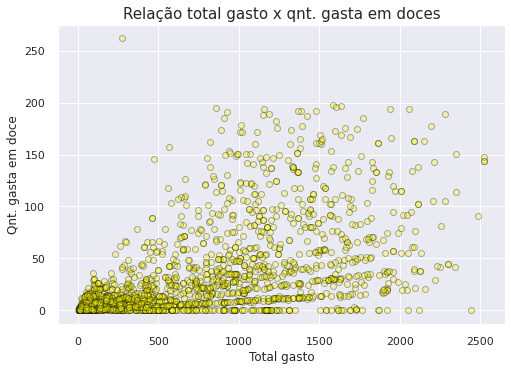

In [286]:
plt.scatter(X['Total gasto'], X['Qnt. gasta em doce'], alpha=0.3, color='yellow',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta em doces', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta em doce', fontsize=12)

plt.show()

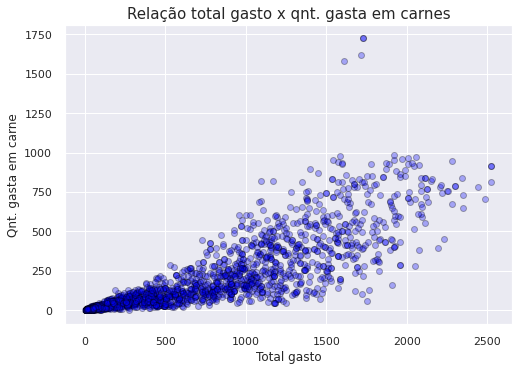

In [287]:
plt.scatter(X['Total gasto'], X['Qnt. gasta em carne'], alpha=0.3, color='blue',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta em carnes', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta em carne', fontsize=12)

plt.show()

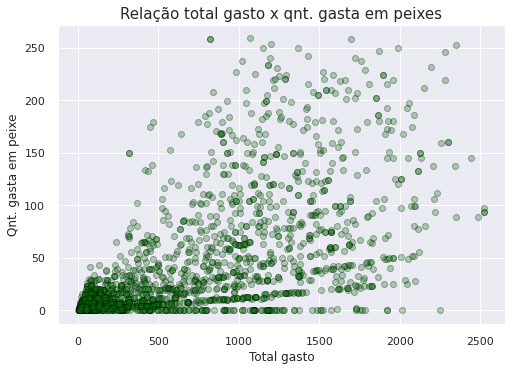

In [289]:
plt.scatter(X['Total gasto'], X['Qnt. gasta em peixe'], alpha=0.3, color='green',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta em peixes', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta em peixe', fontsize=12)

plt.show()

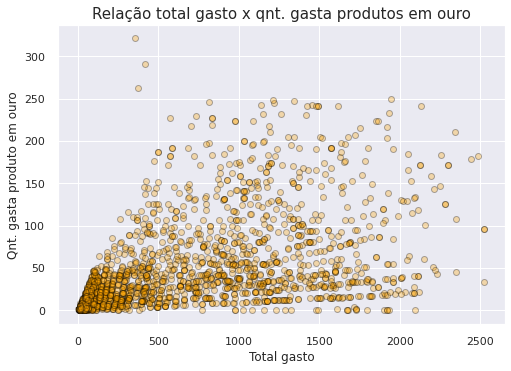

In [291]:
plt.scatter(X['Total gasto'], X['Qnt. gasta produtos em ouro'], alpha=0.3, color='orange',
            edgecolors='black')

plt.title('Relação total gasto x qnt. gasta produtos em ouro', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Qnt. gasta produto em ouro', fontsize=12)

plt.show()

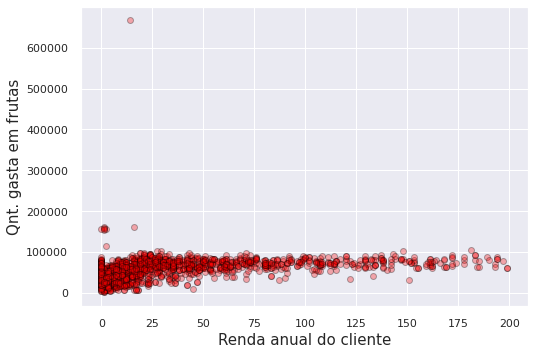

In [293]:
plt.scatter(X['Qnt. gasta em frutas'], X['Renda anual do cliente'], alpha=0.3, 
            color='red', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em frutas', fontsize=15)
plt.show()

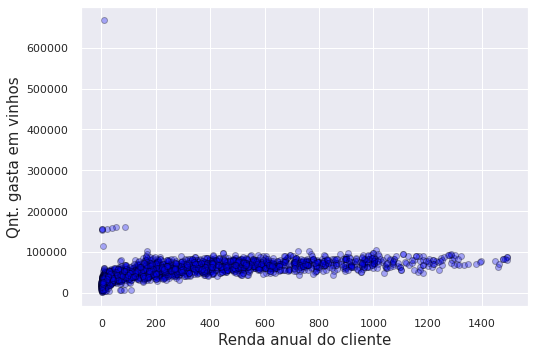

In [294]:
plt.scatter(X['Qnt. gasta em vinho'], X['Renda anual do cliente'], alpha=0.3, 
            color='blue', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em vinhos', fontsize=15)
plt.show()

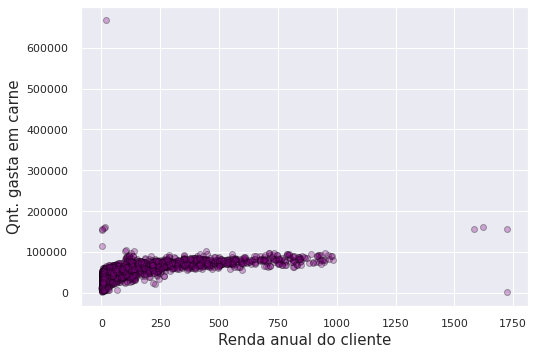

In [296]:
plt.scatter(X['Qnt. gasta em carne'], X['Renda anual do cliente'], alpha=0.3, 
            color='purple', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em carne', fontsize=15)
plt.show()

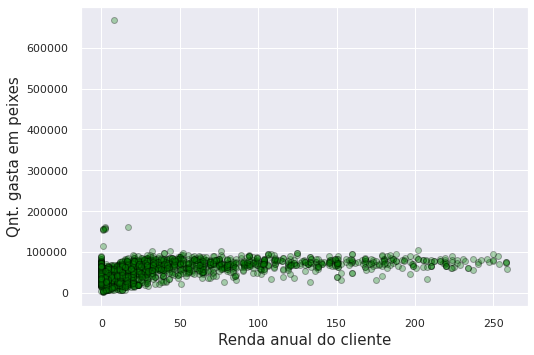

In [297]:
plt.scatter(X['Qnt. gasta em peixe'], X['Renda anual do cliente'], alpha=0.3, 
            color='green', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em peixes', fontsize=15)
plt.show()

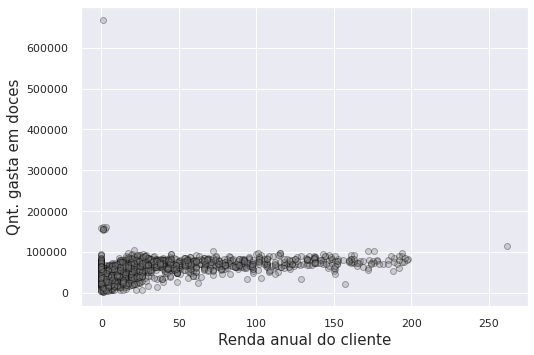

In [300]:
plt.scatter(X['Qnt. gasta em doce'], X['Renda anual do cliente'], alpha=0.3, 
            color='gray', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em doces', fontsize=15)
plt.show()

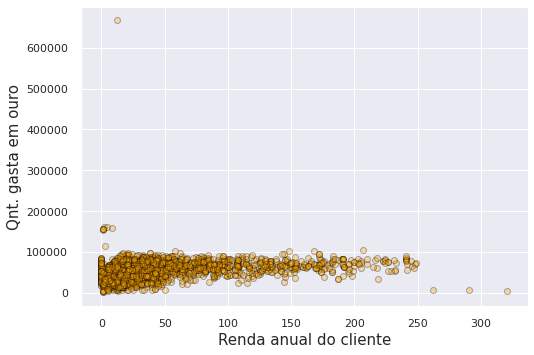

In [301]:
plt.scatter(X['Qnt. gasta produtos em ouro'], X['Renda anual do cliente'], alpha=0.3, 
            color='orange', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em ouro', fontsize=15)
plt.show()

In [306]:
linear_analysis_axisX = X[['Qnt. gasta em vinho', 'Qnt. gasta em carne', 'Qnt. gasta em doce',
                           'Qnt. gasta em peixe', 'Qnt. gasta em frutas', 'Qnt. gasta produtos em ouro']]

linear_analysis_axisY = X[['Renda anual do cliente']]

In [307]:
from sklearn.model_selection import train_test_split

linear_Xtrain, linear_Xtest, linear_ytrain, linear_ytest = train_test_split(
    linear_analysis_axisX, linear_analysis_axisY, test_size=0.25)

In [308]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(linear_Xtrain, linear_ytrain)

In [312]:
linear_pred = linear_model.predict(linear_Xtest)

In [314]:
from sklearn.metrics import r2_score

print('coefficient of determination: ', r2_score(linear_ytest, linear_pred))

coefficient of determination:  0.5868520200914569


In [176]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score

wcss = []

for number_of_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
    kmeans.fit(X)
    kmeans_labels = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    silhouette = silhouette_score(X, kmeans_labels)
    print('For numer_of_clusters = ', number_of_clusters,
          'Silhouette score is = ', silhouette)
    
    colors = cm.nipy_spectral(kmeans_labels / number_of_clusters)

For numer_of_clusters =  2 Silhouette score is =  0.5721124451379548
For numer_of_clusters =  3 Silhouette score is =  0.5763125517857092
For numer_of_clusters =  4 Silhouette score is =  0.48986024554348195
For numer_of_clusters =  5 Silhouette score is =  0.45799329277945133
For numer_of_clusters =  6 Silhouette score is =  0.46252628579409116
For numer_of_clusters =  7 Silhouette score is =  0.43904350907119777
For numer_of_clusters =  8 Silhouette score is =  0.40238997011994615
For numer_of_clusters =  9 Silhouette score is =  0.3786460666499623
For numer_of_clusters =  10 Silhouette score is =  0.37226353063113143
For numer_of_clusters =  11 Silhouette score is =  0.35059112791148933


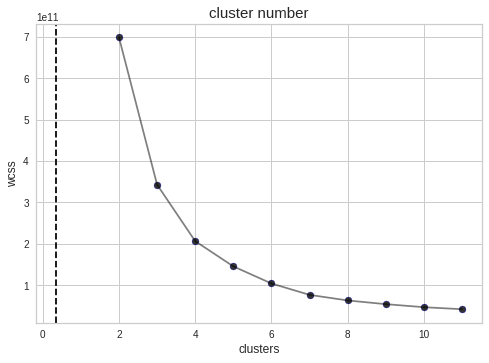

In [89]:
plt.plot(range(2, 12), wcss[0:12], alpha=0.5, color='black')
plt.scatter(range(2, 12), wcss[0:12], alpha=0.8, color='black', edgecolors='blue')
plt.axvline(silhouette, color='black', linestyle='--')
plt.title('cluster number', fontsize=15)
plt.xlabel('clusters', fontsize=12)
plt.ylabel('wcss', fontsize=12)
plt.show()

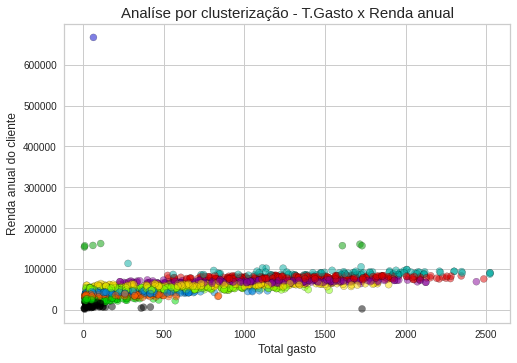

In [188]:
plt.scatter(X['Total gasto'], X['Renda anual do cliente'], 
            c=colors, alpha=0.5, edgecolors='black')

plt.title('Analíse por clusterização - T.Gasto x Renda anual', fontsize=15)
plt.xlabel('Total gasto', fontsize=12)
plt.ylabel('Renda anual do cliente', fontsize=12)

plt.show()

In [192]:
y = X[['Resposta dos clientes à campanha']]

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [215]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree').fit(X_train, y_train)

In [216]:
knn_pred = knn.predict(X_test)

In [242]:
knn_acc = accuracy_score(y_test, knn_pred)
print('accuracy score for knn: ', knn_acc)

accuracy score for knn:  0.8086642599277978


In [235]:
from sklearn import svm

svm = svm.SVC().fit(X_train, y_train)

In [236]:
svm_pred = svm.predict(X_test)

In [256]:
svm_acc = accuracy_score(y_test, svm_pred)
print('accuracy score for svm: ', svm_acc)

accuracy score for svm:  0.8411552346570397


In [263]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1).fit(X_train, y_train)

In [260]:
xgb_pred = xgb_model.predict(X_test)

In [261]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print('accuracy score for xgb: ', xgb_acc)

accuracy score for xgb:  1.0


In [265]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X=X_train, y=y_train, cv=10, n_jobs=1)
print('cross validation accuracy score: ', scores)

cross validation accuracy score:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
